### Imports

In [1]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# import, preprocess, and look over raw data

df = pd.read_csv("data/data_10_11_2024.csv")
df = df.dropna(subset=['DatasetID'])
df.replace("n/a", "", inplace=True)
# df.set_index('DatasetID', inplace=True)

print(f'df shape: {df.shape}')
df.tail()

df shape: (304, 68)


,intern,DatasetID,Warning Message,Error Message,has_visualization,No papers linked - hard to find other data,"Multiple Papers linked, none match NEMAR",HED anotation,Participants,Age range,...,Published date,Uploaded by,Date last update,Dataset DOI,References and links,License,On Brainlife.org,Funding,Ethics Approvals,IRB
302,Liz,ds003483,NaN,NaN,False,NaN,NaN,No,21,NaN,...,1/24/21 10:37,Luis Fernando Antón Toro,NaN,10.18112/openneuro.ds003483.v1.0.2,NaN,CC0,TRUE,NaN,NaN,NaN
303,Liz,ds003352,Please use the checkmaxfilter option before pr...,NaN,False,NaN,NaN,No,18,17-26,...,11/3/20 21:07,Conway Lab,NaN,10.18112/openneuro.ds003352.v1.0.0,"Appelhoff, S., Sanderson, M., Brooks, T., Vlie...",CC0,TRUE,NaN,NaN,NaN
304,Liz,ds002791,The dataset indicates it contains data epochs ...,NaN,False,NaN,NaN,No,23,19-40,...,7/17/20 20:53,Ahmad Mheich,NaN,10.18112/openneuro.ds002791.v1.0.0,NaN,CC0,TRUE,NaN,NaN,NaN
305,Peter,ds005107,NaN,NaN,NaN,NaN,NaN,No,21,20-27,...,6/26/24 6:05,Wei Xu,NaN,doi:10.18112/openneuro.ds005107.v1.0.3,NaN,CC0,FALSE,NaN,NaN,NaN
306,Peter,ds005274,NaN,NaN,NaN,NaN,NaN,No,22,20-26,...,7/7/24 9:38,Yukako Ito,NaN,doi:10.18112/openneuro.ds005274.v1.0.0,NaN,CC0,FALSE,NaN,NaN,NaN


### Figure 1

Modality x Modality of experiment x type of experiment 

Network chart start w main modality (EEG, MEG, IEGG) and then continue to break up (like figure 4 in other paper)

180
180
180
76
76
76
13
13
13
3
3
3


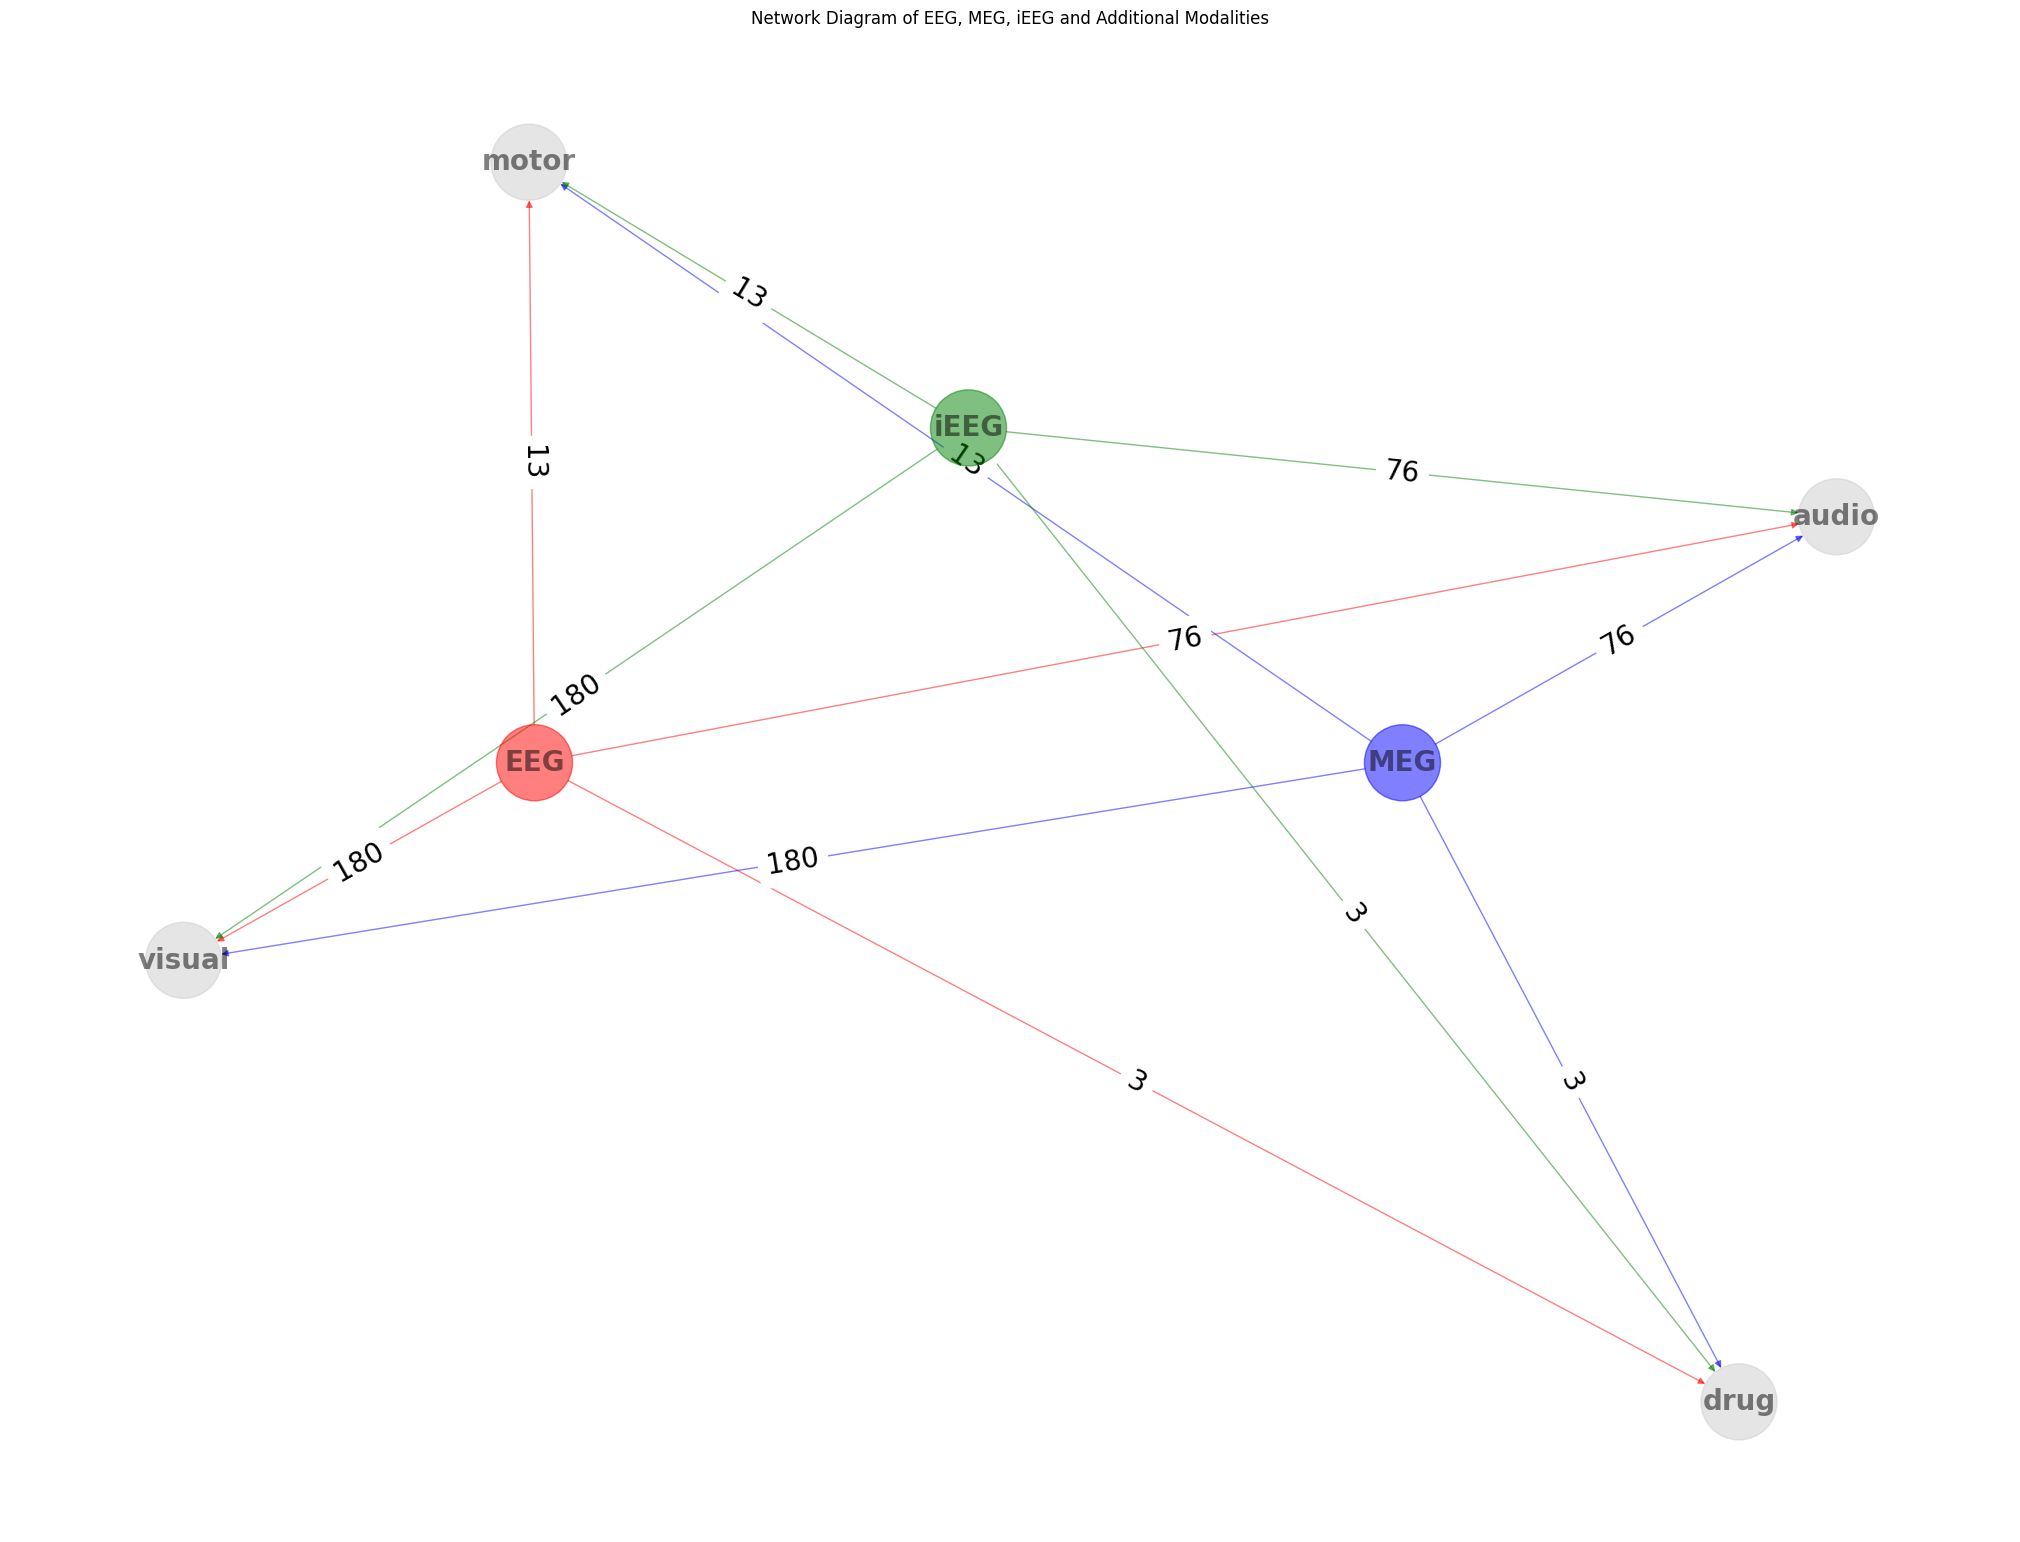

In [106]:
import networkx as nx

df_fig1 = df[['EEG Modality', 'MEG Modality', 'iEEG modality', 'Modality of experiment', 'Type of experiment']]

modalities_fig8 = ['visual', 
                   'audio',
                   'motor',
                   'drug',
                   ]

# Create a directed graph for all primary modalities
G_all = nx.DiGraph()

# Add nodes for primary modalities
for modality in primary_modalities:
    G_all.add_node(modality)

# Add nodes and edges for additional modalities
for additional in modalities_fig8:
    G_all.add_node(additional)
    for modality in primary_modalities:
        count = df_fig1[df_fig1['Modality of experiment'].str.contains(additional, case=False, na=False)].shape[0]
        print(count)
        if count > 0:
            G_all.add_edge(modality, additional, weight=count)

# Define colors for the nodes and edges
node_colors = []
edge_colors = []

for node in G_all.nodes():
    if node in primary_modalities:
        if node == 'EEG':
            node_colors.append('red')
        elif node == 'MEG':
            node_colors.append('blue')
        elif node == 'iEEG':
            node_colors.append('green')
    else:
        node_colors.append('#cccccc')

for edge in G_all.edges():
    if edge[0] == 'EEG':
        edge_colors.append('red')
    elif edge[0] == 'MEG':
        edge_colors.append('blue')
    elif edge[0] == 'iEEG':
        edge_colors.append('green')
    else:
        edge_colors.append('gray')

# Draw the combined graph with primary modalities in different locations
pos_all = nx.spring_layout(G_all, seed=42)
pos_all['EEG'] = [-0.5, 0]
pos_all['MEG'] = [0.5, 0]
pos_all['iEEG'] = [0, 0.5]

plt.figure(figsize=(20, 15))
nx.draw(G_all, 
        pos_all, 
        with_labels=True, 
        node_size=3000, 
        node_color=node_colors, 
        font_size=20, 
        font_weight="bold", 
        edge_color=edge_colors,
        alpha=0.5)
labels_all = nx.get_edge_attributes(G_all, 'weight')
nx.draw_networkx_edge_labels(G_all, pos_all, edge_labels=labels_all, font_size='20')
plt.title("Network Diagram of EEG, MEG, iEEG and Additional Modalities")
plt.show()


In [104]:
df_fig1.head()

,EEG Modality,MEG Modality,iEEG modality,Modality of experiment,Type of experiment


### Figure 2

Figure 2 - Modality x Additional Modality
A network diagram or Sankey diagram displaying the connections between primary modality (e.g., EEG) and additional modalities (e.g., fMRI, behavioral). This can visually represent multi-modality studies and show how often additional methods were used


In [ ]:
df_fig1 = df[['EEG Modality', 
              'MEG Modality', 
              'iEEG modality',
              'Has MRI',
              'Has EOG',
              'Has Behavioral',
              'Has fMRi',
              'Has EcOg',
              'Has DBS',
              'Has SMI',
              'Has EMG',
              'Has TMS',
              'Has ECG',
              'Has SEEG',
              'Has fNIRS',
              'Has Blood Tests',
              'Eye tracking',
              'Other (put in name)']]

df_fig1.rename(columns={
    'EEG Modality': 'EEG',
    'MEG Modality': 'MEG',
    'iEEG modality': 'iEEG',
    'Has MRI': 'MRI',
    'Has EOG': 'EOG',
    'Has Behavioral': 'Behavioral',
    'Has fMRi': 'fMRI',
    'Has EcOg': 'EcOg',
    'Has DBS': 'DBS',
    'Has SMI': 'SMI',
    'Has EMG': 'EMG',
    'Has TMS': 'TMS',
    'Has ECG': 'ECG',
    'Has SEEG': 'SEEG',
    'Has fNIRS': 'fNIRS',
    'Has Blood Tests': 'Blood Tests',
    'Eye tracking': 'Eye Tracking',
    'Other (put in name)': 'Other'
}, inplace=True)

# Create dataframe of eeg as primary modality
df_fig1_eeg = df_fig1[df_fig1['EEG'] == 'X']
df_fig1 = df_fig1[df_fig1['EEG'] != 'X']

# Create dataframe of meg as primary modality
df_fig1_meg = df_fig1[df_fig1['MEG'] == 'X']
df_fig1 = df_fig1[df_fig1['MEG'] != 'X']

# Create dataframe of ieeg as primary modality
df_fig1_ieeg = df_fig1[df_fig1['iEEG'] == 'X']
df_fig1 = df_fig1[df_fig1['iEEG'] != 'X']

# Create a list of primary modalities and additional modalities
primary_modalities = ['EEG', 'MEG', 'iEEG']
additional_modalities = ['MRI', 'EOG', 'Behavioral', 'fMRI', 'EcOg', 'DBS', 'SMI', 'EMG', 'TMS', 'ECG', 'SEEG', 'fNIRS', 'Blood Tests', 'Eye Tracking', 'Other']

# Initialize a dictionary to store the connections
connections = {modality: {additional: 0 for additional in additional_modalities} for modality in primary_modalities}

# Count the connections
for modality in primary_modalities:
    for additional in additional_modalities:
        connections[modality][additional] = df_fig1_eeg[additional].notna().sum() if modality == 'EEG' else \
                                            df_fig1_meg[additional].notna().sum() if modality == 'MEG' else \
                                            df_fig1_ieeg[additional].notna().sum()

# Create lists for the nodes and links
nodes = []
node_indices = {}
links = []
index = 0

for modality in primary_modalities:
    modality_connections = sum(connections[modality].values())
    nodes.append(f"{modality} ({modality_connections})")
    node_indices[modality] = index
    index += 1
    for additional in additional_modalities:
        node_name = f"{modality} - {additional} ({connections[modality][additional]})"
        nodes.append(node_name)
        node_indices[node_name] = index
        index += 1
        if connections[modality][additional] > 0:
            links.append({
                'source': node_indices[modality],
                'target': node_indices[node_name],
                'value': connections[modality][additional]
            })

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=50,
        line=dict(color="black", width=1),
        label=nodes,
        color="black"  # Set the font color to black
    ),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links],
        color="rgba(0, 0, 0, 0.1)"  # Increase transparency of the connections
    )
)])

fig.update_layout(
    title_text="Network Diagram of Modalities and Additional Modalities",
    font=dict(size=15, color="black"),  # Set the font color to black
    height=800  # Increase the height of the figure
)
fig.show()

/var/folders/ds/qxmx4zy969v_twj4bz2m_zvw0000gn/T/ipykernel_71923/827970940.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Figure 3

Figure 3 - Author country x # of datasets x authors from multiple institutions

A world map showing the distribution of author countries. Use circles of varying sizes to represent the number of studies from each country, use heat map to show how many of those studies from each country were collaboration with another institution 


In [108]:
# create dataframe for number of studies from each country

countries = df['Author country']
countries = countries.astype(str)

replacements = {
    "USA": "United States",
    "UK": "United Kingdom",
    "the Netherlands": "Netherlands",
    "The Netherlands": "Netherlands",
    "The Netherlands.": "Netherlands",
    "United States ": "United States",
    "France ": "France",
    "Romani": "Romania", # typo here
}
countries.replace(replacements, inplace=True)

unique_countries, counts = np.unique(countries, return_counts=True)

'''
US has so many studies that it's hard to see the other countries on the map.
Converting to log scale to make it easier to see the other countries.
'''

counts = np.emath.logn(2.71, counts)

country_counts_df = pd.DataFrame({
    'Country': unique_countries,
    'Count': counts
})


# Create a plotly scatter_geo plot
fig3 = px.scatter_geo(country_counts_df, locations="Country", locationmode='country names',
                     size="Count", projection="natural earth",
                     title="World Map with Circles Representing Number of Studies",
                     color_continuous_scale="Viridis")
# Show plot
fig3.show()

### Figure 4

Figure 4 - Published date x number of datasets x modality

A line graph showing the number of publications over time, segmented by modality

In [57]:
df_fig4 = df[['EEG Modality', 
              'MEG Modality', 
              'iEEG modality',
              'Has MRI',
              'Has EOG',
              'Has Behavioral',
              'Has fMRi',
              'Has EcOg',
              'Has DBS',
              'Has SMI',
              'Has EMG',
              'Has TMS',
              'Has ECG',
              'Has SEEG',
              'Has fNIRS',
              'Has Blood Tests',
              'Eye tracking',
              'Other (put in name)',
              'Published date']]

df_fig4.rename(columns={
    'EEG Modality': 'EEG',
    'MEG Modality': 'MEG',
    'iEEG modality': 'iEEG',
    'Has MRI': 'MRI',
    'Has EOG': 'EOG',
    'Has Behavioral': 'Behavioral',
    'Has fMRi': 'fMRI',
    'Has EcOg': 'EcOg',
    'Has DBS': 'DBS',
    'Has SMI': 'SMI',
    'Has EMG': 'EMG',
    'Has TMS': 'TMS',
    'Has ECG': 'ECG',
    'Has SEEG': 'SEEG',
    'Has fNIRS': 'fNIRS',
    'Has Blood Tests': 'Blood Tests',
    'Eye tracking': 'Eye Tracking',
    'Other (put in name)': 'Other'
}, inplace=True)

# Initialize the dictionary with empty dataframes
dfs_by_modalities = {col: pd.DataFrame(columns=df_fig4.columns) for col in df_fig4.columns if col != 'Published date'}

# Populate the dataframes
for index, row in df_fig4.iterrows():
    for col in dfs_by_modalities.keys():
        if pd.notna(row[col]):
            dfs_by_modalities[col].loc[len(dfs_by_modalities[col])] = row

dfs_by_modalities['EEG'].head()

# Convert 'Published date' to datetime for sorting
for modality, modality_df in dfs_by_modalities.items():
    modality_df['Published date'] = pd.to_datetime(modality_df['Published date'])
    dfs_by_modalities[modality] = modality_df.sort_values(by='Published date')

    # Create a cumulative count of publications over time for each modality
    dfs_by_modalities[modality]['Cumulative Publications'] = range(1, len(modality_df) + 1)

# Create a plotly line graph for all modalities
fig4 = go.Figure()

for modality, modality_df in dfs_by_modalities.items():
    fig4.add_trace(go.Scatter(
        x=modality_df['Published date'],
        y=modality_df['Cumulative Publications'],
        mode='lines',
        name=modality
    ))

fig4.update_layout(
    title='Cumulative Publications Over Time for All Modalities',
    xaxis_title='Published Date',
    yaxis_title='Cumulative Number of Publications'
)

fig4.show()


/var/folders/ds/qxmx4zy969v_twj4bz2m_zvw0000gn/T/ipykernel_71923/2501609782.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ds/qxmx4zy969v_twj4bz2m_zvw0000gn/T/ipykernel_71923/2501609782.py:55: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/ds/qxmx4zy969v_twj4bz2m_zvw0000gn/T/ipykernel_71923/2501609782.py:55: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/ds/qxmx4zy969v_twj4bz2m_zvw0000gn/T/ipykernel_71923/2501609782.py:55: UserWarning:

Could not infer format, so each element will be p

### Figure 5

Figure 5 - EEG channel histogram (see which are most common)

In [11]:
df_eeg_channels = df['EEG channels']
df_eeg_channels.replace("n/a", "", inplace=True)
df_eeg_channels.dropna()

# Convert the EEG channels to numeric, forcing errors to NaN
df_eeg_channels = pd.to_numeric(df_eeg_channels, errors='coerce')

# Drop NaN values
df_eeg_channels.dropna(inplace=True)

# Create a plotly histogram
fig = px.histogram(df_eeg_channels, nbins=20, title='Histogram of EEG Channels')
fig.update_layout(
    xaxis_title='Number of EEG Channels',
    yaxis_title='Frequency',
    xaxis=dict(categoryorder='category ascending', tickangle=45, dtick=20)
)
fig.show()

### Figure 7

Figure 7: # of participants x age range x type of subjects 
Bubble chart or grouped bar chart (X-axis Age range, Y-axis: Number of subjects, Grouped Bars: Type of subjects (e.g., clinical vs. healthy))



In [58]:
df_fig7 = df[['Age range',
             'Type of subjects',
             'Participants']]

df_fig7.head()

,Age range,Type of subjects,Participants
3,19 - 29,Healthy,32
4,NaN,"Healthy, right-handed, normal or corrected vis...",1
5,23-31,Healthy,16
6,21-35,NaN,5
7,NaN,Treatment Resistant Depression w DBS,14


### Figure 8

Figure 8: Publish date x # subjects x modality of experiment (visual, audio, etc)
Like figure 7 in other paper


In [73]:
df_fig8 = df[['Published date',
              'Participants',
              'Modality of experiment']]

modalities_fig8 = ['visual', 
                   'audio',
                   'motor',
                   'drug',
                   ]

# Initialize the dictionary with empty dataframes
dfs_by_modalities_fig8 = {modality: pd.DataFrame(columns=df_fig8.columns) for modality in modalities_fig8}

# Populate the dataframes
for index, row in df_fig8.iterrows():
    for modality in modalities_fig8:
        if modality in str(row['Modality of experiment']).lower():
            dfs_by_modalities_fig8[modality].loc[len(dfs_by_modalities_fig8[modality])] = row

# Combine all dataframes in dfs_by_modalities_fig8 into a single dataframe
combined_df = pd.concat(dfs_by_modalities_fig8.values(), keys=dfs_by_modalities_fig8.keys()).reset_index(level=0).rename(columns={'level_0': 'Modality'})

# Convert Participants to numeric for sorting
combined_df['Participants'] = pd.to_numeric(combined_df['Participants'], errors='coerce')

# Create the strip plot with sorted x-axis
fig_strip = px.strip(combined_df.sort_values(by='Participants'), x='Participants', y='Modality', title='Participants by Modality', stripmode='overlay')

# Show the plot
fig_strip.show()

# Filter out the outlier
filtered_combined_df = combined_df[combined_df['Participants'] != 2951]

# Create the second strip plot without the outlier
fig_strip_no_outlier = px.strip(filtered_combined_df.sort_values(by='Participants'), 
                                x='Participants', y='Modality', 
                                title='Participants by Modality (Without Outlier)', 
                                stripmode='overlay')

# Show the plot
fig_strip_no_outlier.show()

### Figure 9

Figure 9: age range x type of subjects x number of subjects
Heat map, sankey, stacked area chart
